# Лабораторная работа №1

## Импорты

In [1]:
import math
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

## Производная (интуиция)

Производная используется в алгоритме градиентного спуска, который является одним из основных численных методов современной оптимизации и широко применяется в машинном обучения. Основная идея метода заключается в том, чтобы идти в направлении наискорейшего спуска, а это направление задаётся антиградиентом. Градиент - вектор, своим направлением указывающий направление наискорейшего роста некоторой скалярной величины. Так для $f$ - функции $n$ переменных $a_1, \dots, a_n$ её градиентом будет n-мерный вектор:\
$$\left(\frac{\partial{f}}{\partial{a_1}}, \dots, \frac{\partial{f}}{\partial{a_n}}\right)$$

Производная показывает чувствительность изменения выходного значения функции по отношению к входному.\
Численный способ получения производной функции в точке $a$:
\begin{equation}
f'(a)=\lim_{h \to 0}\frac{f(a+h)-f(a)}h
\end{equation}
О чем говорит данная формула?\
Если в некоторой точке $a$ увеличить аргумент на некоторое маленькое значение (стремящееся к нулю), то с **какой чувствительностью** функция ответит на это изменение. Или иначе: каково **влияние** входного значение на результат функции. Или иначе: какова **скорость изменения функции** в данной точке $a$.

Производная функции одной переменной при выбранном входном значении, если она существует, представляет собой наклон касательной к графику функции в этой точке. Дополнительная информация: [wiki](https://ru.wikipedia.org/wiki/%D0%9F%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8#%D0%A2%D0%B0%D0%BD%D0%B3%D0%B5%D0%BD%D1%81_%D1%83%D0%B3%D0%BB%D0%B0_%D0%BD%D0%B0%D0%BA%D0%BB%D0%BE%D0%BD%D0%B0_%D0%BA%D0%B0%D1%81%D0%B0%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9_%D0%BF%D1%80%D1%8F%D0%BC%D0%BE%D0%B9).

Определим $h$ и функцию для нахождения производной от $f(x)$ численным методом:

In [2]:
h = 0.00000001


def derivative(f, x, print_intermediate_results=False):
    """Calculates the derivative using the formula (f(x + h) - f(x)) / h"""
    out_for_x = f(x)
    out_for_x_plus_h = f(x + h)
    diff = out_for_x_plus_h - out_for_x
    normalized_value = diff / h
    if print_intermediate_results:
        print(
            "f(x):", out_for_x,
            "\nf(x+h):", out_for_x_plus_h,
            '\ndiff (or not normalized sensitive):', diff,
            "\nnormalized sensitive or derivative:", normalized_value
        )
    return normalized_value

Рассмотрим функцию:

In [3]:
def f(x):
    return 2*x**2 - 3*x + 4

 Отобразим график данной функции:

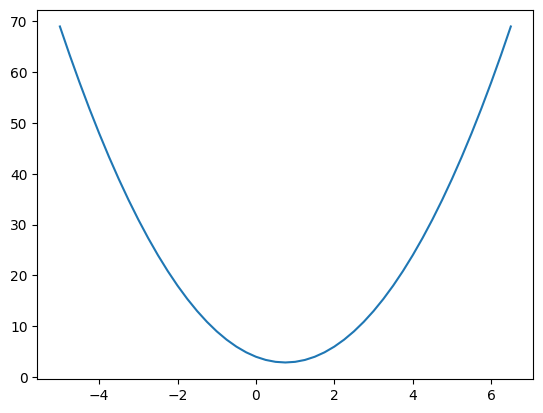

In [4]:
xs = np.arange(-5, 6.75, 0.25)
ys = f(xs)
plt.plot(xs, ys)

Найдем производную в точке $x_1=4$:

In [5]:
x1 = 4
out = derivative(f, x1, print_intermediate_results=True)

f(x): 24 
f(x+h): 24.00000013 
diff (or not normalized sensitive): 1.300000000981072e-07 
normalized sensitive or derivative: 13.00000000981072


Полученное значение производной $f'(x) \approx 13$. Проверим правильность:\
Функция: $2*x^2-3*x+4$\
Производная: $4*x-3$\
Подставим $x_1=4$: $4*4-3$\
Ответ: $13$ (результат верный)

Поскольку в результате добавления небольшого значения к аргументу, результат функции увеличился - это означает, что производная будет положительной. И наоборот: положительная производная означает, что увеличение аргумента приведет к увеличению выходного значения функции. То, как увеличится это значение, можно понять из величины производной.

Отобразим касательную к $f(x)$ в точке $x_1=4$, используя значение производной в этой точке для определения наклона касательной:

In [6]:
def plot_graph_with_tangent():
    # Define tangent line
    # y = m * (x - x1) + y1
    def line(x, x1, y1):
        return derivative(f, x1) * (x - x1) + y1

    y1 = f(x1)
    # Define x data range for tangent line
    xrange = np.linspace(x1 - 1.2, x1 + 1.2, 10)

    # Plot the figure
    plt.figure()
    plt.plot(xs, f(xs), label='parabola')
    plt.scatter(x1, y1, color='C1', s=50)
    plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2, label=f'tangent line with slope={derivative(f, x1):.2f}')
    plt.legend()

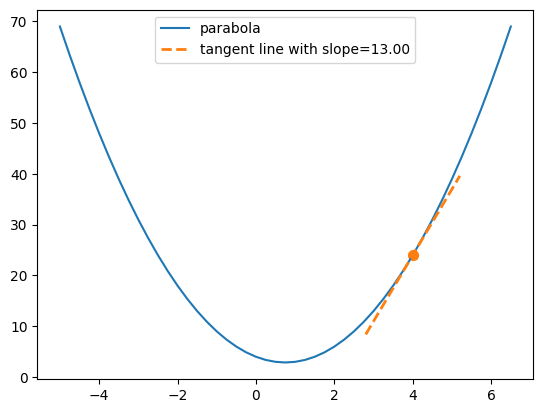

In [7]:
plot_graph_with_tangent()

Теперь найдем производную в точке $x_1=-2$:

In [8]:
x1 = -2
out = derivative(f, x1, print_intermediate_results=True)

f(x): 18 
f(x+h): 17.99999989 
diff (or not normalized sensitive): -1.0999999844329977e-07 
normalized sensitive or derivative: -10.999999844329977


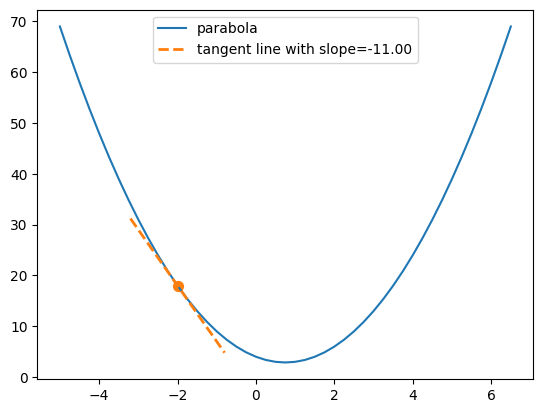

In [9]:
plot_graph_with_tangent()

## 1 - Линейная регрессия

Модель линейной регрессии:
$$f_{w,b}(x) = wx + b$$
Для обучения модели линейной регрессии, необходимо найти оптимальные параметры $(w,b)$, соответствующие рассматриваемому набору данных.\
Чтобы сравнить, насколько один вариант $(w,b)$ лучше или хуже другого, используется эмпирический риск $Q(f,x)$.\
Параметры $(w,b)$, которые лучше всего соответствуют данным - это те, для которых эмпирический риск $Q(f,x)$ имеет наименьшее значение.\
Чтобы найти параметры $(w,b)$, для которых эмпирический риск $Q(f,x)$ минимален, можно использовать метод под названием **градиентный спуск**.\
С каждым шагом градиентного спуска параметры $(w,b)$ приближаются к оптимальным значениям, которые позволят достичь наименьшого значения $Q(f,x)$.\
В результате будет получена обученная модель линейной регрессии, для которой можно будет взять входной признак $x$ и вывести прогноз $f_{w,b}(x)$.

#### Эмпирический риск $Q(f,x)$

Как было указано в лекции, эмпирический риск для квадратичной функции потерь имеет следующий вид:
$$Q(f,X^l)=\frac{1}{2l}\sum_{i=1}^{l}{(f(x_i)-y_i)^2}$$
где $l$ - количество строк данных в исходном наборе. Двойка в знаменателе $\frac{1}{2l}$ добавлена для удобства (при нахождении производной для градиентного спуска двойка сокращается).

### Задание №1

#### Одномерная линейная регрессия

Это линейная регрессия с одной независимой скалярной переменной, который имеет слуюдующий вид:
$$f_{w,b}(x_i) = wx_i + b \tag{1}$$
где $i$ - номер строки в наборе данных.

Используя набор данных $train.csv$ реализуйте процесс обучения одномерной линейной регрессии.

#### Нахождение эмпирического риска

Реализуйте функцию нахождения эмпирического риска:

In [10]:
def empirical_risk(x, y, w, b):
    """
    Return empirical risk for linear regression.
    
    Parameters
    ----------
    x : ndarray
    y : ndarray
    w : float
    b : float
    
    Returns
    -------
    empirical_risk : float
    """
    # TODO

#### Градиентный спуск

Градиентный спуск используется для нахождения оптимальных параметров $w, b$ одномерной линейной регрессии.\
Алгоритм градиентного спуска:
\begin{align*}& 
\text{repeat until convergence:} \; \lbrace \newline \; & 
\phantom {0000} b := b -  h \frac{\partial Q(w,b)}{\partial b} \newline \; & 
\phantom {0000} w := w -  h \frac{\partial Q(w,b)}{\partial w} \tag{2} \; & 
\newline & 
\rbrace
\end{align*}
где $h$ - темп обучения и
$$
\frac{\partial Q(w,b)}{\partial b} = \frac{1}{l} \sum\limits_{i = 0}^{l-1} (f_{w,b}(x_{i}) - y_{i}) \tag{3}
$$
$$
\frac{\partial Q(w,b)}{\partial w} = \frac{1}{l} \sum\limits_{i = 0}^{l-1} (f_{w,b}(x_{i}) -y_{i})x_{i} \tag{4}
$$
Пример нахождения частой производной $\frac{\partial Q(w,b)}{\partial w}$ можно найти [здесь](https://medium.com/analytics-vidhya/linear-regression-with-gradient-descent-derivation-c10685ddf0f4) (Раздел 5. Calculate (∂(loss)/ ∂w)).

Реализуйте функцию для нахождения градиента параметров $w, b$.\
Для этого проитерируйтесь через весь входной набор данных, считая $(f_{w,b}(x_{i}) - y_{i})$ и $(f_{w,b}(x_{i}) -y_{i})x_{i}$, а затем вычислите общий градиент для всех входных данных и верните его (см. $(3)$ и $(4)$).

In [11]:
def compute_gradient(x, y, w, b):
    """
    Calculates the gradient for a given set of inputs and parameters.
    
    Parameters
    ----------
    x : ndarray
    y : ndarray
    w : float
    b : float

    Returns
    -------
    dQ_dw : float
    dQ_db : float
    """
    # TODO

Найдите оптимальные парамтеры $w, b$ используя градиентный спуск (он также называется Batch Gradient Descent, для дополнительной информации см. [типы алгоритмов градиентного спуска](https://www.baeldung.com/cs/gradient-stochastic-and-mini-batch)).\
Для этого реализуйте функцию `gradient_descent` (см. $(2)$). Используйте `empirical_risk` для отслеживания процесса обучения и  `compute_gradient` для нахождения $\frac{\partial Q(w,b)}{\partial b}$ и $\frac{\partial Q(w,b)}{\partial w}$ на каждой итерации обучения.

In [12]:
def gradient_descent(x, y, w_init, b_init, h, num_iters):
    """
    Performs batch gradient descent for a given set of inputs and w_init, b_init.
    
    Parameters
    ----------
    x : ndarray
    y : ndarray
    w_init, b_init : float 
        Initial values of model parameters
    h : float 
        Learning rate
    num_iters : int 
        Number of iterations

    Returns
    -------
    w : float
    b : float
    """
    # TODO

Полученные параметры используйте в модели линейной регрессии $(1)$ для получения предсказаний. Отобразите полученный результат на графике. 

### Задание №2

Используя класс [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) из пакета [Scikit-learn](https://scikit-learn.org/stable/) реализуйте линейную регрессию. `SGDRegressor` реализует алгоритм стохастического градиентного спуска, отличающийся от обычного градиентного спуска тем, что градиент оптимизируемой функции считается на каждом шаге не как сумма градиентов от каждого элемента выборки, а как градиент от одного, случайно выбранного элемента. Такой подход позволяет оптимизировать процесс обучения.\
Используя те же данные, и сравните результаты. Они могут не совпадать, но должны быть похожи.
